In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
Fs = 2000 # frecuencia de muestreo
tstep = 1 / Fs
f0 = 100

N = int ( 10 * Fs / f0 ) # Numero de muestras
print(tstep)

0.0005


In [27]:
t = np.linspace(0, (N-1)*tstep, int(N))
print(t)

[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.0105 0.011  0.0115 0.012  0.0125 0.013  0.0135 0.014  0.0145
 0.015  0.0155 0.016  0.0165 0.017  0.0175 0.018  0.0185 0.019  0.0195
 0.02   0.0205 0.021  0.0215 0.022  0.0225 0.023  0.0235 0.024  0.0245
 0.025  0.0255 0.026  0.0265 0.027  0.0275 0.028  0.0285 0.029  0.0295
 0.03   0.0305 0.031  0.0315 0.032  0.0325 0.033  0.0335 0.034  0.0345
 0.035  0.0355 0.036  0.0365 0.037  0.0375 0.038  0.0385 0.039  0.0395
 0.04   0.0405 0.041  0.0415 0.042  0.0425 0.043  0.0435 0.044  0.0445
 0.045  0.0455 0.046  0.0465 0.047  0.0475 0.048  0.0485 0.049  0.0495
 0.05   0.0505 0.051  0.0515 0.052  0.0525 0.053  0.0535 0.054  0.0545
 0.055  0.0555 0.056  0.0565 0.057  0.0575 0.058  0.0585 0.059  0.0595
 0.06   0.0605 0.061  0.0615 0.062  0.0625 0.063  0.0635 0.064  0.0645
 0.065  0.0655 0.066  0.0665 0.067  0.0675 0.068  0.0685 0.069  0.0695
 0.07 

In [28]:
fstep = Fs / N
freq = np.linspace(0, (N-1)*fstep, int(N))
print(freq)

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000. 1010. 1020. 1030. 1040. 1050. 1060. 1070.
 1080. 1090. 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190.
 1200. 1210. 1220. 1230. 1240. 1250. 1260. 1270. 1280. 1290. 1300. 1310.
 1320. 1330. 1340. 1350. 1360. 1370. 1380. 1390. 1400. 1410. 1420. 1430.
 1440. 1450. 1460. 1470. 1480. 1490. 1500. 1510. 1520. 1530. 1540. 1550.
 1560. 1570. 1580. 1590. 1600. 1610. 1620. 1630. 16

In [46]:
def GetSample(t,A,f0,modos=1):
    
    #y = np.sqrt(t)
    
    
    y = 1.0 * A * np.sin( 2 * np.pi * ( 1 * f0 ) * t )
    
    if modos == 2:
        y += 0.5 * A * np.sin( 2 * np.pi * ( 3 * f0 ) * t )
    elif modos == 3:
        y += 0.5 * A * np.sin( 2 * np.pi * ( 3 * f0 ) * t )
        y += 4.0 * A * np.sin( 2 * np.pi * ( 4 * f0 ) * t )
        
    
    return y

In [47]:
y = GetSample(t,1,f0,3)

In [48]:
X = np.fft.fft(y)
XMag = np.abs(X) / len(y)
# Nyquist

In [49]:
freq2 = freq[0:int(N/2+1)]
XMag2  = 2.0*XMag[0:int(N/2+1)]

<StemContainer object of 3 artists>

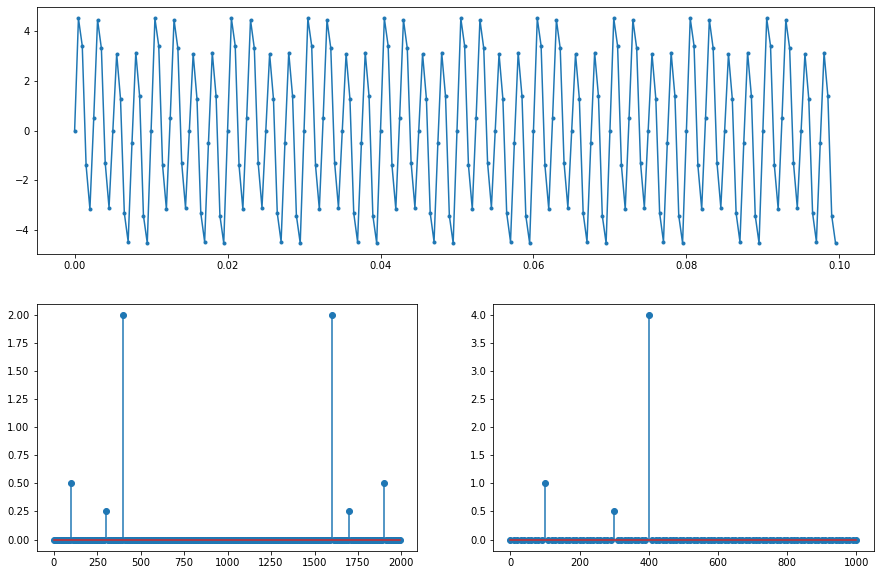

In [50]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,4)
ax.plot(t,y,'.-')
ax1.stem(freq,XMag,use_line_collection=True)
ax2.stem(freq2,XMag2,use_line_collection=True)

In [52]:
# Masking
mask1 = freq > 350
X[mask1] = 0

In [53]:
XMag_ = np.abs(X) / len(y)
XMag2_ = 2.0*XMag_[0:int(N/2+1)]

<StemContainer object of 3 artists>

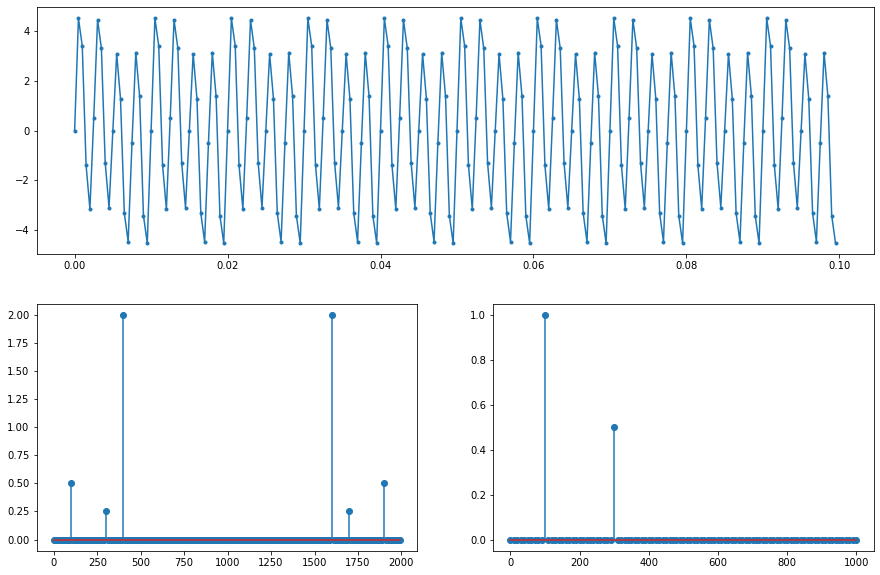

In [55]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,4)
ax.plot(t,y,'.-')
ax1.stem(freq,XMag,use_line_collection=True)
ax2.stem(freq2,XMag2_,use_line_collection=True)

In [56]:
NewSample = np.fft.ifft(2*X)

In [57]:
y1 = GetSample(t,1,f0,2)

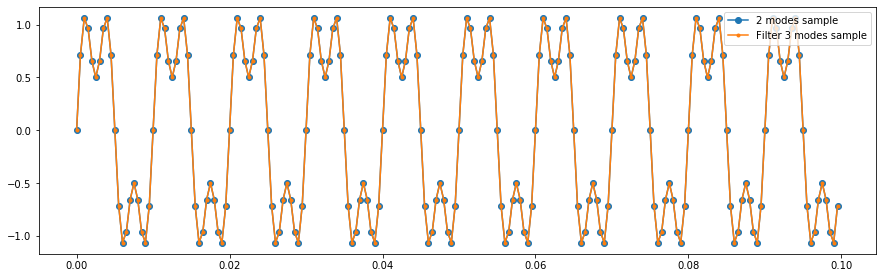

In [58]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax.plot(t,y1,marker='o',label='2 modes sample')
ax.plot(t,np.real(NewSample),'.-',label='Filter 3 modes sample')
plt.legend(loc=1)